In [1]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision
import cv2
import numpy as np
from pathlib import Path
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.models as models
import random
from tensorboardX import SummaryWriter
import cv2

from dataset import *
from transforms import *
from discriminator import *

In [3]:
exp = 'exp4'
epoch = 199

In [4]:
cfg = parse('/mnt/4TB/aaron/verify_hand_crop_disc/config_{}.cfg'.format(exp))

model_type = cfg['model']

if model_type == 'dcgan':
    model = DCGAN_Discriminator().cuda()

model = model.eval()

In [5]:
map_loc = 'cuda:0'
load_dir = Path(ROOT)/'verify_hand_crop_disc'/'data'/'{}'.format(exp)/'model_verify_hand_disc_{}.state'.format(epoch)
ckpt = torch.load(load_dir, map_location=map_loc)
model.load_state_dict(ckpt['model_state_dict'])


cfg['aug'] = False

dataset = FPHA_Hand_Crop_Dataset(cfg, 'test')

kwargs = {
    'batch_size'    : 1,
    'shuffle'       : cfg['shuffle'],
    'num_workers'   : int(cfg['num_workers']),
    'sampler'       : None,
    'pin_memory'    : True
}

dataloader = torch.utils.data.DataLoader(dataset, **kwargs)

# Inference

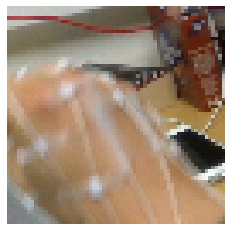

GT 0
Pred 0.8417873382568359
False Positive


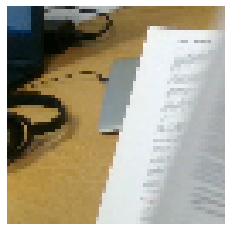

GT 0
Pred 0.042613230645656586
True Negative


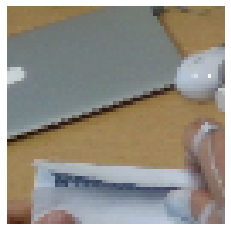

GT 0
Pred 0.00034564000088721514
True Negative


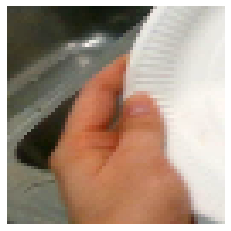

GT 0
Pred 0.0739358440041542
True Negative


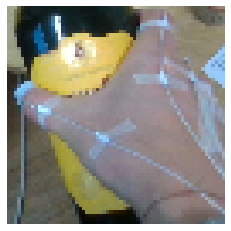

GT 1
Pred 0.7817944288253784
True Positive


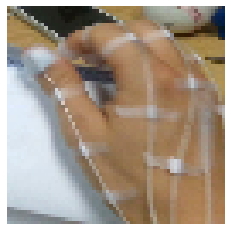

GT 1
Pred 0.999744713306427
True Positive


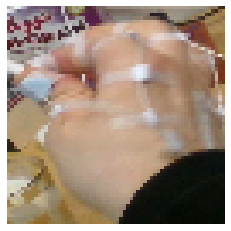

GT 1
Pred 0.9994564652442932
True Positive


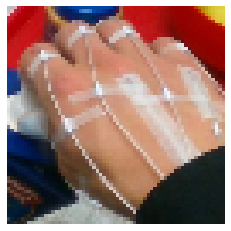

GT 1
Pred 0.9998816251754761
True Positive


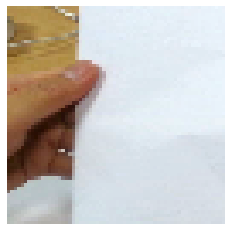

GT 0
Pred 0.0005560987046919763
True Negative


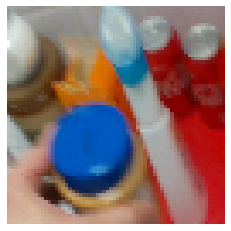

GT 0
Pred 0.0002968684711959213
True Negative


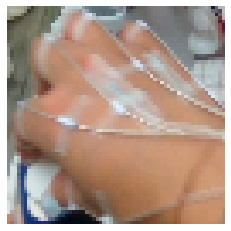

GT 1
Pred 0.9965564012527466
True Positive


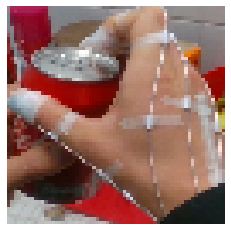

GT 1
Pred 0.9967817068099976
True Positive


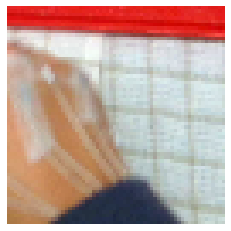

GT 0
Pred 0.2907901406288147
True Negative


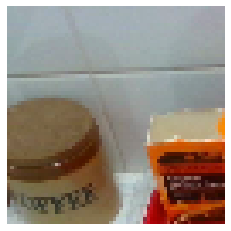

GT 0
Pred 0.0001768385263858363
True Negative


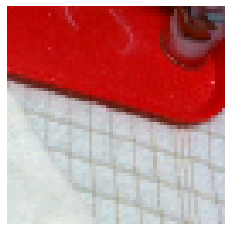

GT 0
Pred 3.400117202545516e-05
True Negative


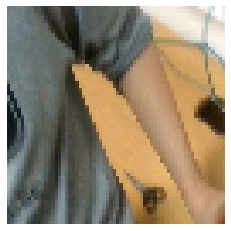

GT 0
Pred 0.20393578708171844
True Negative


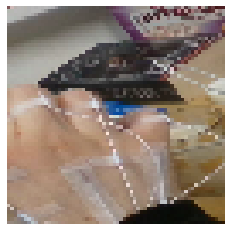

GT 0
Pred 0.2689783275127411
True Negative


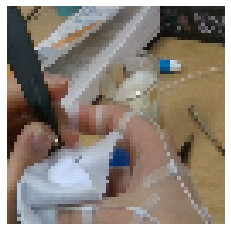

GT 0
Pred 0.08921044319868088
True Negative


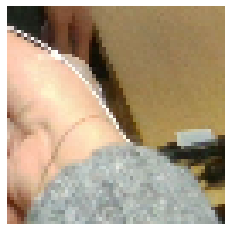

GT 0
Pred 4.078891288372688e-05
True Negative


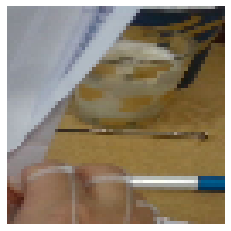

GT 0
Pred 0.0415351428091526
True Negative


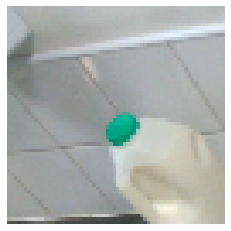

GT 0
Pred 0.0032938322983682156
True Negative


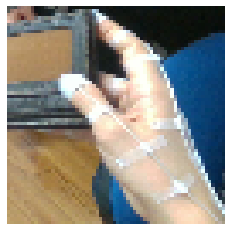

GT 1
Pred 0.9962092638015747
True Positive


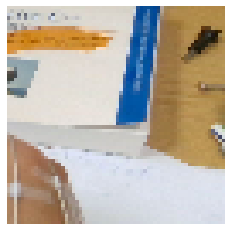

GT 0
Pred 0.0009614812443032861
True Negative


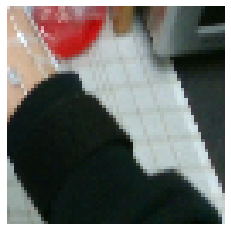

GT 0
Pred 0.022711267694830894
True Negative


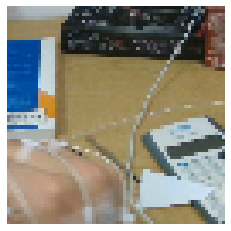

GT 0
Pred 0.023656437173485756
True Negative


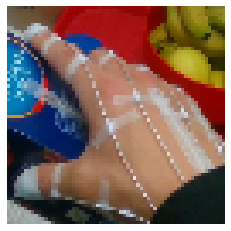

GT 1
Pred 0.9993102550506592
True Positive


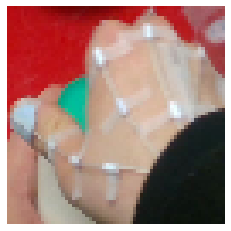

GT 1
Pred 0.9999829530715942
True Positive


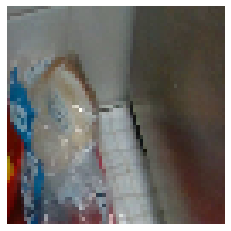

GT 0
Pred 0.09578007459640503
True Negative


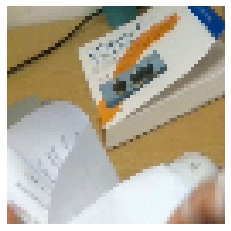

GT 0
Pred 0.0006396896787919104
True Negative


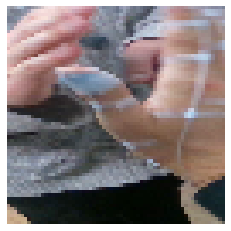

GT 0
Pred 0.15357105433940887
True Negative


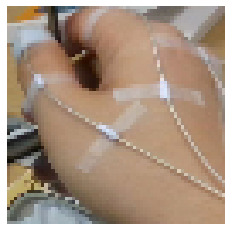

GT 1
Pred 0.9993182420730591
True Positive


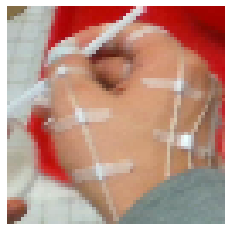

GT 1
Pred 0.9998979568481445
True Positive


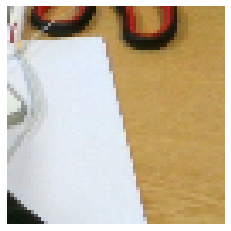

GT 0
Pred 0.0011010351590812206
True Negative


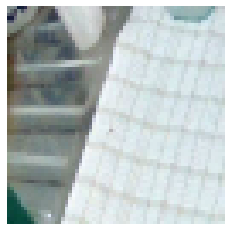

GT 0
Pred 0.009807594120502472
True Negative


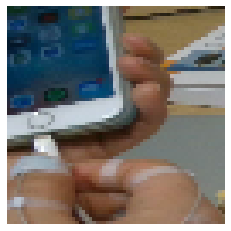

GT 0
Pred 0.0038704939652234316
True Negative


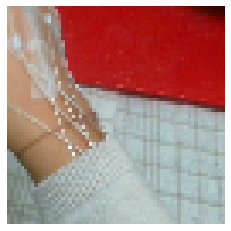

GT 0
Pred 4.093929601367563e-05
True Negative


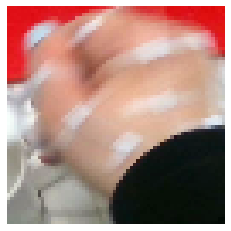

GT 1
Pred 0.9994518160820007
True Positive


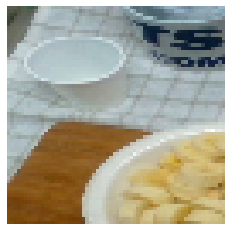

GT 0
Pred 0.0008582486188970506
True Negative


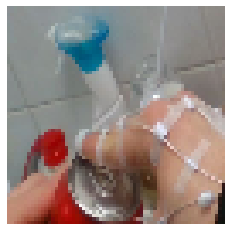

GT 0
Pred 0.1994970738887787
True Negative


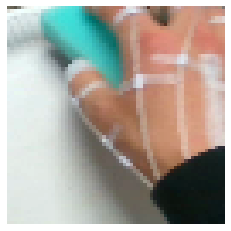

GT 0
Pred 0.9112900495529175
False Positive


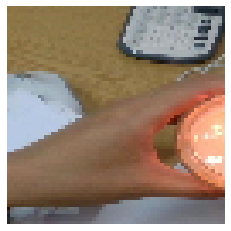

GT 0
Pred 0.003062320640310645
True Negative


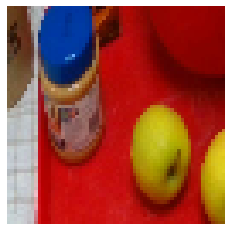

GT 0
Pred 0.005977320484817028
True Negative


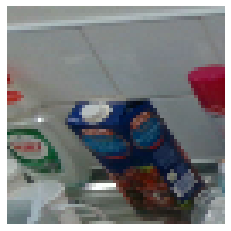

GT 0
Pred 0.0036170908715575933
True Negative


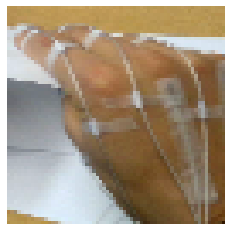

GT 1
Pred 0.9949572682380676
True Positive


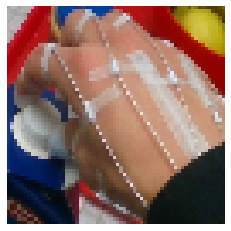

GT 1
Pred 0.9999134540557861
True Positive


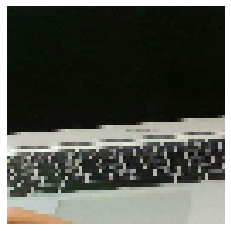

GT 0
Pred 1.8196229575551115e-05
True Negative


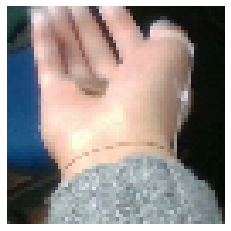

GT 1
Pred 0.7395710349082947
True Positive


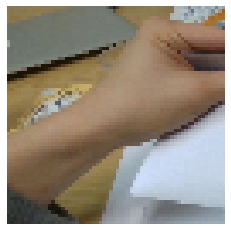

GT 0
Pred 0.007779460866004229
True Negative


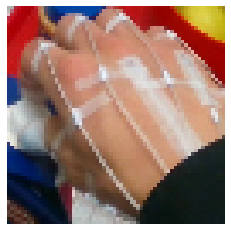

GT 1
Pred 0.9998937845230103
True Positive


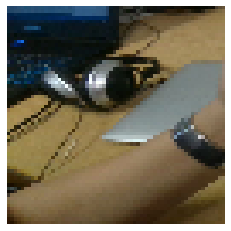

GT 0
Pred 0.0017055138014256954
True Negative


In [6]:
for i in range(50):
    data_load = next(iter(dataloader))
    img_crop, is_hand = data_load
    img_crop_numpy = ImgToNumpy()(img_crop)

    idx = 0
    img = img_crop_numpy[idx].copy()
    cur_is_hand = is_hand[idx].item()

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()

    img_crop_cuda = img_crop.cuda()
    out = model(img_crop_cuda)
    out = out.squeeze()

    print('GT', cur_is_hand)
    print('Pred', out.item())
    thresh = 0.5
    if out > thresh and cur_is_hand == 1:
        print('True Positive')
    elif out > thresh and cur_is_hand == 0:
        print('False Positive')
    elif out < thresh and cur_is_hand == 1:
        print('False Negative')
    elif out < thresh and cur_is_hand == 0:
        print('True Negative')

# Custom test

In [11]:
# seq = ('P03_P03_10_7118_open_juice', 144)
# seq = ('P02_P02_09_5236_pour_salt', 100)
seq = ('P01_P01_03_502_put-down_milk', 49)
# seq = ('P22_P22_07_25388_wash_sponge', 53)
# seq = ('P23_P23_02_29021_take_garlic', 74)

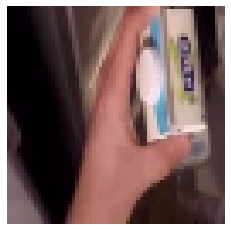

PRED: 0.7422517538070679


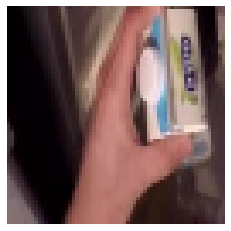

PRED: 0.7473131418228149


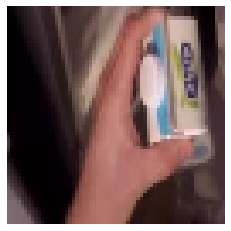

PRED: 0.8303734660148621


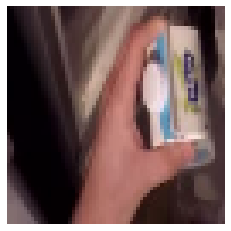

PRED: 0.8525766134262085


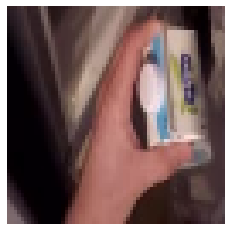

PRED: 0.9168916940689087


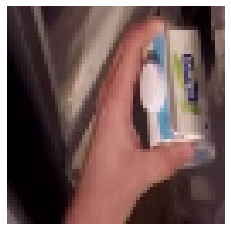

PRED: 0.910442054271698


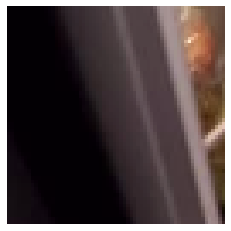

PRED: 0.043927669525146484


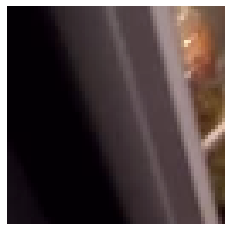

PRED: 0.08278705924749374


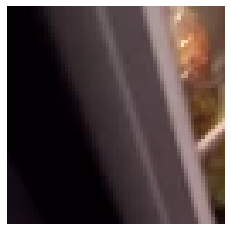

PRED: 0.1013883426785469


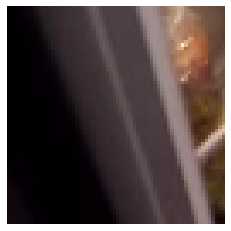

PRED: 0.09979206323623657


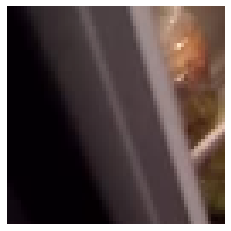

PRED: 0.18188369274139404


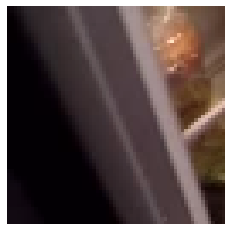

PRED: 0.21853050589561462


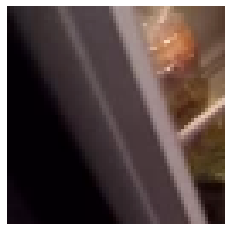

PRED: 0.1961241066455841


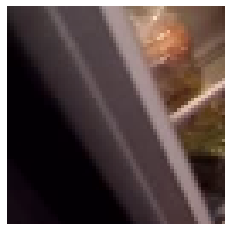

PRED: 0.16623231768608093


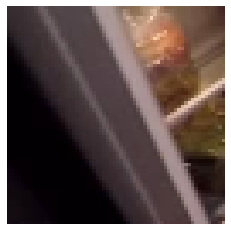

PRED: 0.2146001011133194


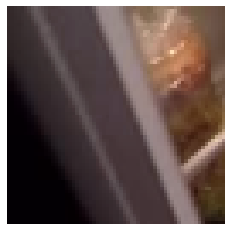

PRED: 0.14900171756744385


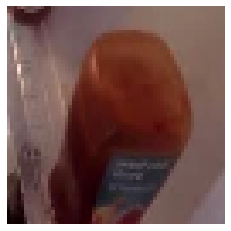

PRED: 0.03999324515461922


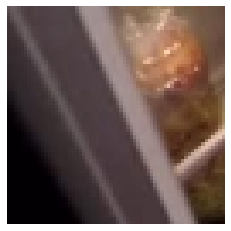

PRED: 0.22062483429908752


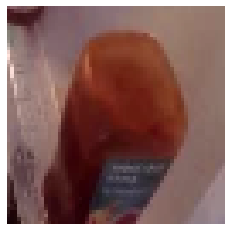

PRED: 0.036903269588947296


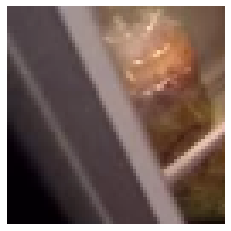

PRED: 0.38569462299346924


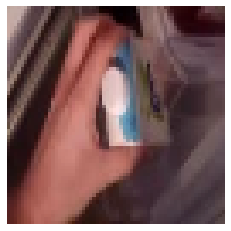

PRED: 0.20947229862213135


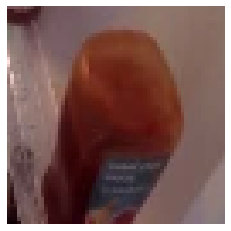

PRED: 0.03404070809483528


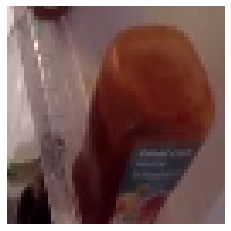

PRED: 0.03965672105550766


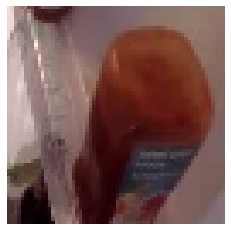

PRED: 0.04667472839355469


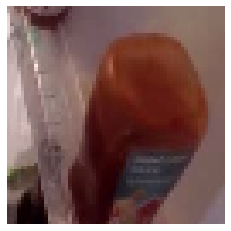

PRED: 0.08270114660263062


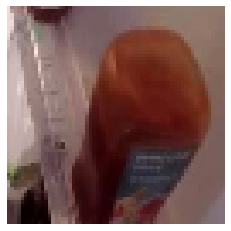

PRED: 0.05210183933377266


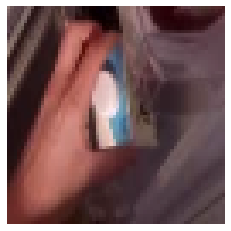

PRED: 0.24181079864501953


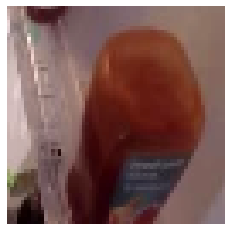

PRED: 0.09441114962100983


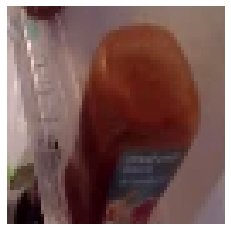

PRED: 0.04520304501056671


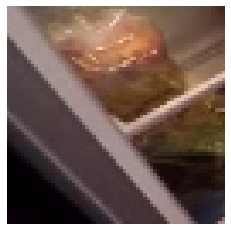

PRED: 0.04794317111372948


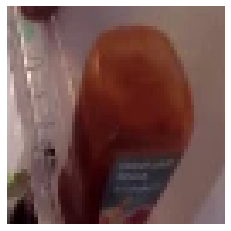

PRED: 0.026654411107301712


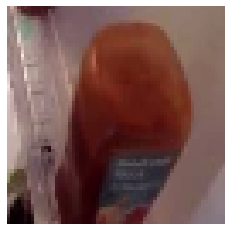

PRED: 0.024325735867023468


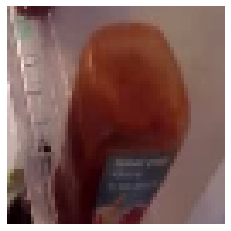

PRED: 0.027119530364871025


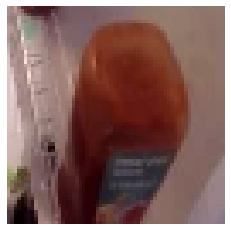

PRED: 0.022826889529824257


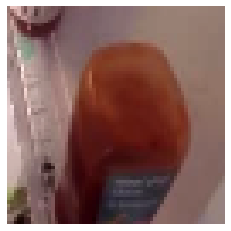

PRED: 0.04881180450320244


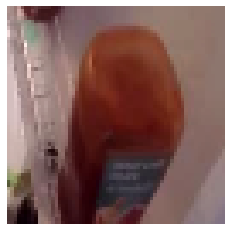

PRED: 0.03159525245428085


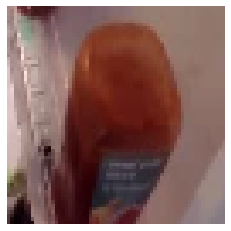

PRED: 0.029753731563687325


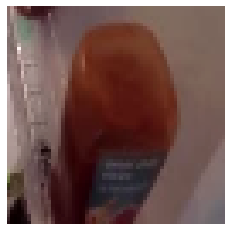

PRED: 0.01959015615284443


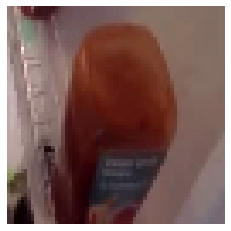

PRED: 0.011850116774439812


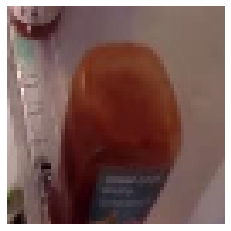

PRED: 0.04665067419409752


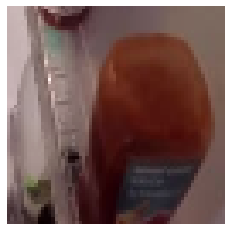

PRED: 0.031047943979501724


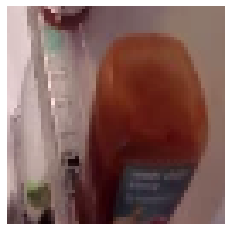

PRED: 0.03575588017702103


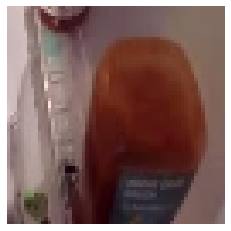

PRED: 0.06271850317716599


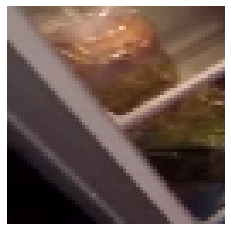

PRED: 0.03335756063461304


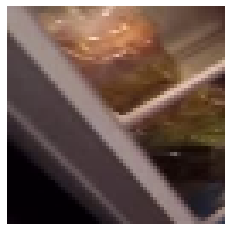

PRED: 0.040341008454561234


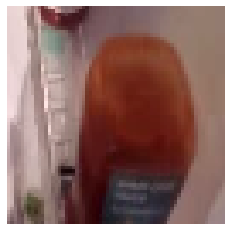

PRED: 0.03298624977469444


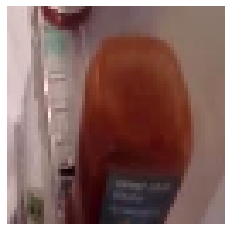

PRED: 0.031135259196162224


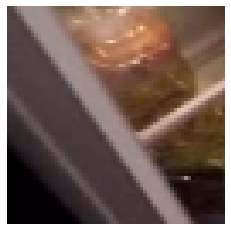

PRED: 0.07240696996450424


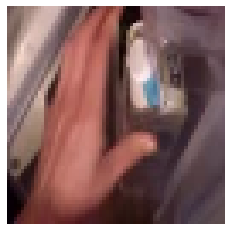

PRED: 0.6565166115760803


In [12]:
seq_name = seq[0]
seq_range = seq[1]
for idx in range(seq_range):
    img_name = 'detect_{}_fpha_hpo_hand_exp1_200_eval_{}.png'.format(seq_name, idx)
    img = cv2.imread('/mnt/4TB/aaron/mlcv-exp/data/saved/{}/{}'.format(seq_name, img_name))[:, :, ::-1]

    tfrm = []
    img_rsz = 64
    tfrm.append(ImgResize((img_rsz)))
    tfrm.append(ImgToTorch())
    transform = torchvision.transforms.Compose(tfrm)

    sample          = {'img': img}
    sample          = transform(sample)
    sample_img      = sample['img'].unsqueeze(0)
    img_numpy = ImgToNumpy()(sample_img)[0]

    fig, ax = plt.subplots()
    ax.imshow(img_numpy)
    plt.axis('off')
    plt.show()

    img_cuda = sample_img.cuda()
    out = model(img_cuda)
    out = out.squeeze()
    print('PRED:', out.item())